In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('D:/Projects/Research/CapstoneCampusX/gurgaon_properties_missing_value_imputation.csv')

In [3]:
df.shape

(3554, 18)

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,umang winter hills,sector 77,0.86,6408.0,2,2,2,16.0,New Property,1214.0,0,0,0,0,0,1,79
1,flat,pivotal devaan,sector 84,0.41,7033.0,2,2,2,10.0,New Property,565.0,0,0,0,0,0,1,23
2,house,dlf city plots,sector 26,17.30,38737.0,6,7,3+,3.0,New Property,4518.0,1,1,1,1,0,1,124
3,house,sector 38 rwa,sector 38,4.30,28782.0,3,9,3+,3.0,Relatively New,1494.0,0,0,0,1,1,1,41
4,house,independent,sector 92,1.80,7627.0,4,5,0,13.0,Relatively New,2360.0,0,0,0,0,0,2,0


In [6]:
latlong = pd.read_csv('D:/Projects/Research/CapstoneCampusX/Dataset/latlong.csv')

In [7]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [8]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [9]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [10]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [11]:
new_df = df.merge(latlong, on='sector')

In [12]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [14]:
custom_mean = lambda x: x.mean(skipna=True)  # Define a custom mean function that handles NaN values
group_df = new_df.groupby('sector').agg({'price': custom_mean, 'price_per_sqft': custom_mean, 'built_up_area': custom_mean, 'latitude': custom_mean, 'longitude': custom_mean})


In [16]:
#group_df = new_df.groupby('sector').mean()[['price','price_per_sqft','built_up_area','latitude','longitude']]

In [15]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
sector 103,1.495000,7445.785714,1865.428571,28.4949,76.9845
...,...,...,...,...,...
sector 92,0.934000,5928.290000,1571.341800,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326
sector 95,0.480545,5602.509091,995.981818,28.4172,76.9081


In [131]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [17]:
new_df.to_csv('data_viz1.csv',index=False)

In [18]:
df1 = pd.read_csv('D:/Projects/Research/CapstoneCampusX/gurgaon_properties.csv')

In [19]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Sector 77 Gurgaon,flat,umang winter hills,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,not available,"Sector 77 Gurgaon, Gurgaon, Haryana",16.0,NaN,0 to 1 Year Old,"['Entertainland Mall', 'Delhi Jaipur Expresswa...",We are the proud owners of this 2 bhk apartmen...,"['1 Water Purifier', '5 Fan', '3 Geyser', '1 S...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Green Area5 out of 5', 'Construction5 out of..."
1,2 BHK Flat in Sector 84 Gurgaon,flat,pivotal devaan,0.41,7032.0,583.0,Super Built up area 583(54.16 sq.m.)Built Up a...,2,2,2,not available,"Sector 84 Gurgaon, Gurgaon, Haryana",10.0,East,0 to 1 Year Old,"['Dwarka Expressway', 'RPS International Schoo...",It's a east facing flat. Huge sunlight one can...,"['3 Fan', '1 Exhaust Fan', '1 Geyser', '8 Ligh...","['Security / Fire Alarm', 'Lift(s)', 'Maintena...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,6 Bedroom House for sale in DLF Phase 1,house,dlf city plots,17.30,38734.0,4466.0,Plot area 502(419.74 sq.m.),6,7,3+,"pooja room,store room,study room,servant room","Brand New Deal, DLF Phase 1, Gurgaon, Haryana",3.0,North,0 to 1 Year Old,"['Phase 2 Metro Station', 'Grand Mall', 'Jacar...",North facing\nCorner property\nBest scenic ara...,"['1 Exhaust Fan', '6 Geyser', '8 AC', '1 Modul...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,2 BHK Flat in Sector-11 sohna,flat,global hill view,0.30,4599.0,652.0,Carpet area: 761 (70.7 sq.m.),2,2,2,not available,"Tower 1,flat 1608, Global Hill View,sohna Sect...",16.0,South-East,1 to 5 Year Old,NaN,This is your chance to own a 2 bhk residential...,NaN,NaN,NaN
4,9 Bedroom House for sale in Sector 38 Gurgaon,house,sector 38 rwa,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,9,9,3+,"pooja room,others","166 Sq Yd, Stilt,lift,demand At 4.30 Cr, Secto...",3.0,East,1 to 5 Year Old,"['Rajiv Chowk Mosque', 'Icici bank ATM', 'Stat...",This is a residential house for sale in sector...,"['14 Wardrobe', '1 Water Purifier', '14 Fan', ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Safety4 out of 5', ..."


In [20]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [21]:
wordcloud_df.head()

,features,sector
0,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 77
1,"['Security / Fire Alarm', 'Lift(s)', 'Maintena...",sector 84
2,"['Feng Shui / Vaastu Compliant', 'Private Gard...",sector 26
3,NaN,sector 38
4,"['Feng Shui / Vaastu Compliant', 'Private Gard...",sector 92


In [22]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [23]:
main

['Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Water purifier',
 'Maintenance Staff',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Internet/wi-fi connectivity',
 'Fitness Centre / GYM',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Security / Fire Alarm',
 'Lift(s)',
 'Maintenance Staff',
 'Park',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Centrally Air Conditioned',
 'High Ceiling Height',
 'Maintenance Staff',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Fitness Centre / GYM',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Maintenance Staff',
 'Water Storage',
 'Visitor Parking',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Feng Shui / Va

In [24]:
from wordcloud import WordCloud

In [25]:
feature_text = ' '.join(main)

In [26]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

In [27]:
feature_text

'Security / Fire Alarm Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Water purifier Maintenance Staff Visitor Parking Swimming Pool Park Internet/wi-fi connectivity Fitness Centre / GYM Rain Water Harvesting Club house / Community Center Security / Fire Alarm Lift(s) Maintenance Staff Park Feng Shui / Vaastu Compliant Private Garden / Terrace Centrally Air Conditioned High Ceiling Height Maintenance Staff Water Storage Separate entry for servant room No open drainage around Visitor Parking Swimming Pool Park Security Personnel Natural Light Airy Rooms Spacious Interiors Fitness Centre / GYM Waste Disposal Rain Water Harvesting Club house / Community Center Feng Shui / Vaastu Compliant Private Garden / Terrace Maintenance Staff Water Storage Visitor Parking Waste Disposal Rain Water Harvesting Feng Shui / Vaastu Compliant Private Garden / Terrace Maintenance Staff Water Storage Park Visitor Parking Centrally Air Conditioned Water purifier Security / Fire Alarm Power Back-up Fen

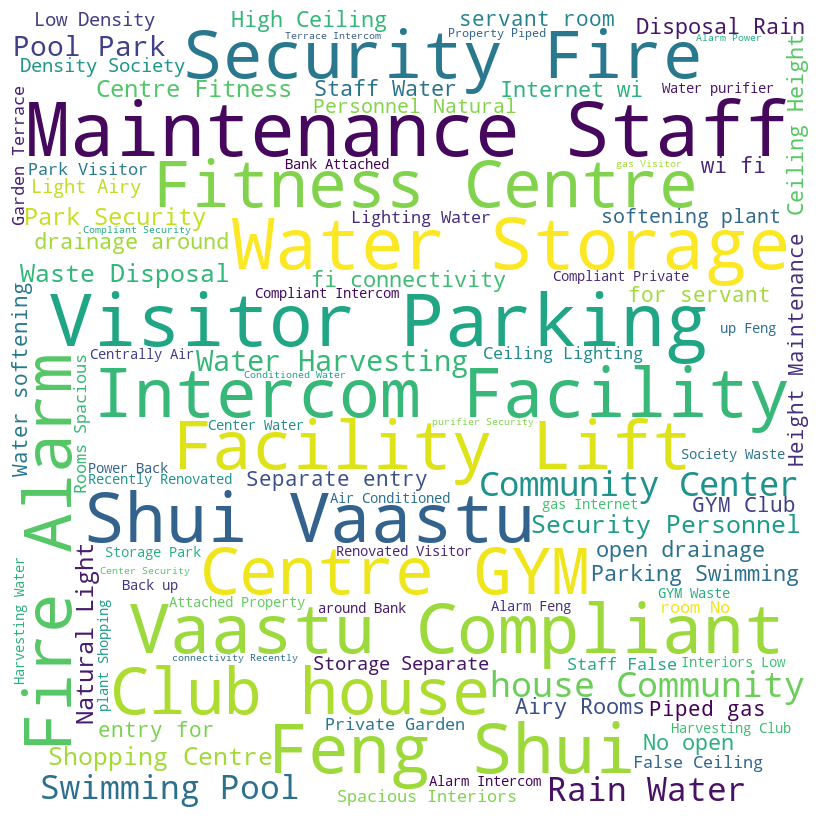

In [28]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

In [100]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

In [29]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [30]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [31]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


C:\Users\User\AppData\Local\Temp\ipykernel_52464\3761596323.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\User\anaconda3\envs\Research_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\User\AppData\Local\Temp\ipykernel_52464\3761596323.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a

<Axes: xlabel='price', ylabel='Density'>

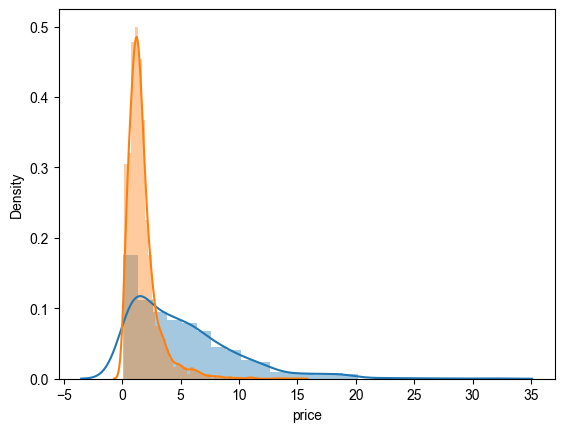

In [32]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [33]:
new_df['sector'].unique().tolist().insert(0,'overall')